Imports

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder


from sklearn.svm import SVC

call the dataset

In [36]:
test = pd.read_csv('test.csv', encoding='unicode_escape')
df = pd.read_csv('train.csv', encoding='unicode_escape')

df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [37]:
df.dropna()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [38]:
X = df['text']
y = df['sentiment']

Process

In [39]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [40]:
df.drop(columns=['Country', 'textID', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'], inplace=True)

In [41]:
df

,text,selected_text,sentiment,Time of Tweet,Age of User
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30
2,my boss is bullying me...,bullying me,negative,night,31-45
3,what interview! leave me alone,leave me alone,negative,morning,46-60
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70
...,...,...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative,night,31-45
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70
27479,But it was worth it ****.,But it was worth it ****.,positive,night,70-100


C:\Users\zeidh\AppData\Local\Temp\ipykernel_26228\4097379447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


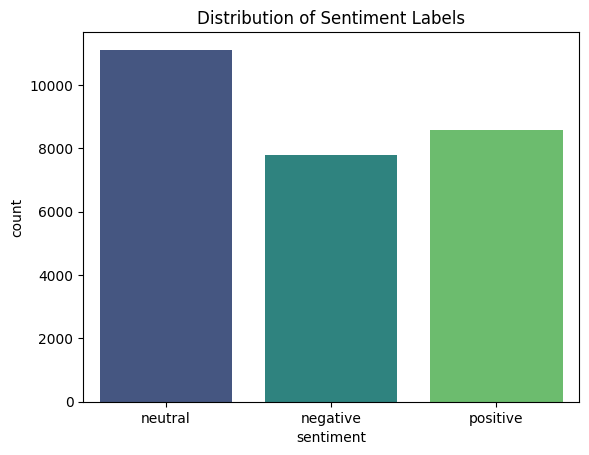

In [42]:
# Distribution of sentiment labels
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title("Distribution of Sentiment Labels")
plt.show()

In [43]:
"""sentiment = df['sentiment']
df.drop(columns=['sentiment'], inplace=True)"""

"sentiment = df['sentiment']\ndf.drop(columns=['sentiment'], inplace=True)"

encode the string data for model training

In [47]:
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
X = v.fit_transform(df['text'].values.astype('U'))

val_X = v.fit_transform(test['text'].values.astype('U'))
#y = v.fit_transform(df['sentiment'].values.astype('U'))

divide the data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21984, 26439), (5497, 26439), (21984,), (5497,))

Algorithm

In [49]:
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
y_pred = model_svc.predict(X_test)
y_pred


array(['neutral', 'neutral', 'neutral', ..., 'negative', 'positive',
       'positive'], dtype=object)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.17%


In [53]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.61      0.67      1562
     neutral       0.64      0.79      0.71      2230
    positive       0.81      0.70      0.75      1705

    accuracy                           0.71      5497
   macro avg       0.73      0.70      0.71      5497
weighted avg       0.73      0.71      0.71      5497



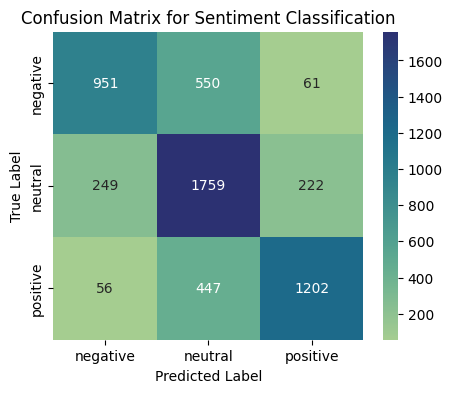

In [55]:
# True sentiment labels
true_sentiments = y_test

# Predicted sentiment labels 
predicted_sentiments = y_pred

# Generate confusion matrix
labels = ["negative", "neutral", "positive"]
cm = confusion_matrix(true_sentiments, predicted_sentiments, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Sentiment Classification")
plt.show()